In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#Accesing the mnist dataset

mnist = keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

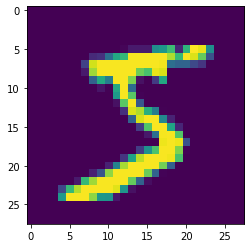

In [41]:
plt.imshow(X_train_full[0])

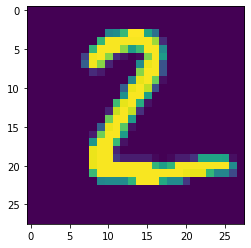

In [42]:
plt.imshow(X_test[1])

In [43]:
#Normalisation of the data

X_train_n = X_train_full / 255
X_test_n = X_test / 255

In [44]:
#Creating a validation dataset
#We take first 5000 data for the validation dataset and rest for the training
X_valid, X_train = X_train_n[:6000],X_train_n[6000:]
y_valid, y_train = y_train_full[:6000],y_train_full[6000:]
X_test = X_test_n

In [45]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
#creating an ANN model

np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


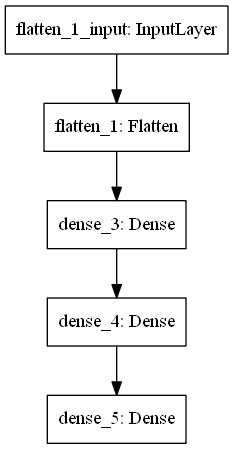

In [49]:
import pydot
keras.utils.plot_model(model)

In [50]:
#compiling and training the model

model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [51]:
#fitting the data

model_history = model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 2s 1ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 2s 930us/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2488 - accuracy: 0.9293 - val_loss: 0.2254 - val_accuracy: 0.9385
Epoch 4/60
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1893 - accuracy: 0.9462 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1637 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 2s 990us/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1483 - val_accur

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0091 - accuracy: 0.9993 - val_loss: 0.0790 - val_accuracy: 0.9773
Epoch 58/60
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.0773 - val_accuracy: 0.9778
Epoch 59/60
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0085 - accuracy: 0.9993 - val_loss: 0.0798 - val_accuracy: 0.9770
Epoch 60/60
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.0803 - val_accuracy: 0.9772


In [52]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [53]:
model_history.history

{'loss': [0.6606810092926025,
  0.30064910650253296,
  0.24879586696624756,
  0.21510861814022064,
  0.18929550051689148,
  0.16901041567325592,
  0.15213742852210999,
  0.1378406435251236,
  0.12604959309101105,
  0.11573587357997894,
  0.10667417198419571,
  0.0991302877664566,
  0.0917779803276062,
  0.08571785688400269,
  0.08021797984838486,
  0.07520415633916855,
  0.07073912024497986,
  0.06598038971424103,
  0.06247304379940033,
  0.05878259614109993,
  0.055575042963027954,
  0.0525231808423996,
  0.04961642622947693,
  0.04685394465923309,
  0.04433048889040947,
  0.042062435299158096,
  0.039854150265455246,
  0.03781918063759804,
  0.035810548812150955,
  0.033877722918987274,
  0.03216657042503357,
  0.030406944453716278,
  0.028979187831282616,
  0.027416404336690903,
  0.02600179798901081,
  0.02466021291911602,
  0.023695431649684906,
  0.02232976444065571,
  0.021196363493800163,
  0.020227748900651932,
  0.019151365384459496,
  0.0182862039655447,
  0.0174171160906553

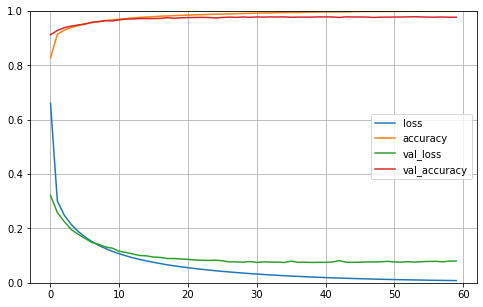

In [54]:
#plotting the loss and accuracy graph

import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [55]:
#evaluating the performance using test dataset

model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 642us/step - loss: 0.0740 - accuracy: 0.9794


[0.07404445111751556, 0.9793999791145325]

In [56]:
#predicting first five records of the dataset mnist
X_new = X_test[:5]

In [57]:
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [58]:
y_pred = model.predict_classes(X_new)
y_pred

array([7, 2, 1, 0, 4], dtype=int64)

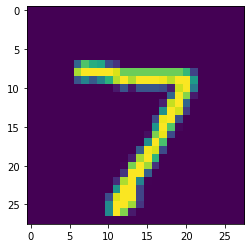

In [59]:
plt.imshow(X_test[0])

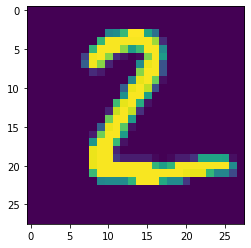

In [60]:
plt.imshow(X_test[1])

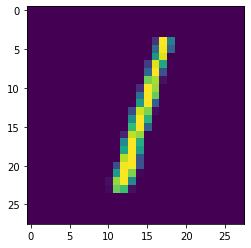

In [61]:
plt.imshow(X_test[2])

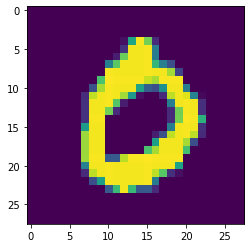

In [62]:
plt.imshow(X_test[3])

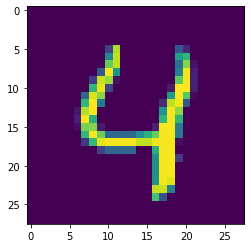

In [63]:
plt.imshow(X_test[4])

# Conclusion

The test data when fed to the model is accurate.
After 60 epochs,
When the training and validation dataset is given -> accuracy -> 0.9771 
When test data is given -> accuracy -> 0.9794